In [1]:
import sys
sys.path.append('d:/code/pywfn')
from pywfn.reader import LogReader
from pywfn.base import Mol

动态链接库目录 d:\code\pywfn\pywfn\libs
当前系统:windows


## 原子电荷

In [2]:
from pywfn.atomprop import charge
paths=[
  "D:\gfile\pywfn\C6H6.log"
]
mols=[Mol(LogReader(path)) for path in paths]
caler=charge.Calculator(mols[0])

In [4]:
mols[0].basis.name

'6-31G(d)'

In [3]:
caler.mulliken()

array([-0.1284, -0.1284, -0.1284, -0.1284, -0.1284, -0.1284,  0.1285,
        0.1285,  0.1285,  0.1285,  0.1285,  0.1285])

In [4]:
caler.lowdin()

array([-0.1564, -0.1597, -0.1597, -0.1564, -0.1597, -0.1597,  0.1571,
        0.1595,  0.1595,  0.1571,  0.1595,  0.1595])

In [5]:
caler.sapce()

array([-0.1302, -0.1295, -0.1295, -0.1302, -0.1295, -0.1295,  0.1285,
        0.1311,  0.1311,  0.1285,  0.1311,  0.1311])

In [6]:
caler.hirshfeld()

array([-0.0362, -0.0345, -0.0345, -0.0362, -0.0345, -0.0345,  0.0518,
        0.0512,  0.0512,  0.0518,  0.0512,  0.0512])

In [3]:
caler.piElectron('mulliken')

array([[ 1.    , -0.    , -0.    ,  1.    ,  0.9851],
       [ 2.    ,  0.    ,  0.    ,  1.    ,  0.9851],
       [ 3.    ,  0.    ,  0.    ,  1.    ,  0.9851],
       [ 4.    ,  0.    , -0.    ,  1.    ,  0.9851],
       [ 5.    , -0.    ,  0.    ,  1.    ,  0.9851],
       [ 6.    ,  0.    ,  0.    ,  1.    ,  0.9851],
       [ 7.    , -0.    , -0.    ,  1.    ,  0.    ],
       [ 8.    ,  0.    ,  0.    ,  1.    ,  0.    ],
       [ 9.    ,  0.    ,  0.    ,  1.    ,  0.    ],
       [10.    ,  0.    , -0.    ,  1.    ,  0.    ],
       [11.    , -0.    ,  0.    ,  1.    ,  0.    ],
       [12.    ,  0.    ,  0.    ,  1.    ,  0.    ]])

In [3]:
from pywfn.atomprop import direction
mol=mols[0]
dirCaler=direction.Calculator(mol)
atms=[1,2]
dirs=[dirCaler.normal(atm) for atm in atms]
caler.dirElectron('mulliken',atms,dirs)

NameError: name 'mols' is not defined

### Hirshfeld 电荷

甲烷Hirshfeld电荷
```
Final atomic charges:
 Atom    1(C ):    -0.13008024
 Atom    2(H ):     0.03252006
 Atom    3(H ):     0.03252006
 Atom    4(H ):     0.03252006
 Atom    5(H ):     0.03252006
```
丙烷Hirshfeld电荷
```
Final atomic charges:
 Atom    1(C ):    -0.08744980
 Atom    2(C ):    -0.04679342
 Atom    3(C ):    -0.08745757
 Atom    4(H ):     0.02762285
 Atom    5(H ):     0.02762573
 Atom    6(H ):     0.02905107
 Atom    7(H ):     0.02655318
 Atom    8(H ):     0.02654707
 Atom    9(H ):     0.02762252
 Atom   10(H ):     0.02905080
 Atom   11(H ):     0.02762758
```

In [2]:
from pywfn.atomprop import charge
import numpy as np
mol=Mol(LogReader(rf"D:\gfile\pywfn\电荷\CH4.out"))
charges=charge.Calculator(mol).hirshfeld()
print(charges,charges.sum())
charges=charges-charges.mean()
print(charges,charges.sum())
# charges+=np.abs(charges)/np.sum(np.abs(charges))
# print(charges,charges.sum())

[-0.1228  0.0346  0.0346  0.0346  0.0346] 0.015661051856732278
[-0.1259  0.0315  0.0315  0.0315  0.0315] 1.3877787807814457e-17


(23, 23)


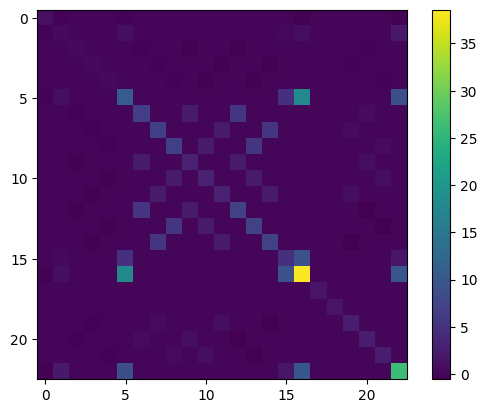

In [14]:
CM=mol.CM
print(CM.shape)
mat=np.zeros(shape=(23,23))
for i in range(23):
    for j in range(23):
        mat[i,j]=np.sum(CM[:,i]*CM[:,j])
import matplotlib.pyplot as plt
plt.imshow(mat)
plt.colorbar()

In [3]:
from pywfn.atomprop import charge
import numpy as np
mol=Mol(LogReader(rf"D:\gfile\MFD\gdb_13.out"))
charges=charge.Calculator(mol).hirshfeld()
print(charges,charges.sum())
charges=charges-charges.mean()
print(charges,charges.sum())

(313782, 3)
[-0.0798 -0.0391 -0.0799  0.0299  0.0299  0.0313  0.0288  0.0288  0.0299
  0.0313  0.0299] 0.04087284276814196
[-0.0836 -0.0429 -0.0836  0.0262  0.0262  0.0276  0.0251  0.0251  0.0262
  0.0276  0.0262] 1.3877787807814457e-17


## 原子自旋

In [9]:
from pywfn.atomprop import spin
paths=[
    rf"D:\gfile\pywfn\活性测试\NHCN.log",
    rf"D:\gfile\pywfn\活性测试\NHC0.log",
    rf"D:\gfile\pywfn\活性测试\NHCP.log"
]
mols=[Mol(LogReader(path)) for path in paths]
caler=spin.Calculator(mols[0])

In [10]:
caler.spins('mulliken')

array([-0.0511,  0.3506,  0.6239, -0.0241,  0.6857, -0.5708,  0.0177,
        0.0034,  0.0178, -0.0531])

In [11]:
caler.spins('lowdin')

array([-0.038 ,  0.3309,  0.5878, -0.0039,  0.6482, -0.5208,  0.0157,
        0.0026,  0.0158, -0.0383])

In [12]:
caler.spins('space')

array([-0.0511,  0.3502,  0.6245, -0.0241,  0.6871, -0.571 ,  0.0176,
        0.0034,  0.0177, -0.0529])

In [13]:
caler.spins('hirshfeld')

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

## 原子活性

In [2]:
from pywfn.atomprop import activity
paths=[
    rf"D:\gfile\pywfn\活性测试\NHCN.log",
    rf"D:\gfile\pywfn\活性测试\NHC0.log",
    rf"D:\gfile\pywfn\活性测试\NHCP.log"
]
mols=[Mol(LogReader(path)) for path in paths]
caler=activity.Calculator(mols[1])

In [3]:
caler.fukui(molN=mols[0],molP=mols[2],chrg='mulliken')

array([[-0.012 ,  0.0009],
       [ 0.1586,  0.0493],
       [ 0.1138,  0.069 ],
       [ 0.2294,  0.2836],
       [ 0.207 ,  0.2544],
       [ 0.0151,  0.1475],
       [ 0.0657,  0.0354],
       [ 0.048 ,  0.0379],
       [ 0.0658,  0.0354],
       [ 0.1086,  0.0867]])

In [4]:
caler.parr(molN=mols[0],molP=mols[2],chrg='mulliken')

array([[-0.1083,  0.0572],
       [ 0.7681, -0.4175],
       [ 0.1034,  0.5205],
       [-0.2038,  0.1797],
       [ 0.1496,  0.5361],
       [-0.7672,  0.1965],
       [ 0.0338, -0.0161],
       [ 0.0057, -0.0023],
       [ 0.0339, -0.0161],
       [-0.0151, -0.038 ]])

In [5]:
caler.dualDescriptor(molN=mols[0],molP=mols[2],chrg='mulliken')

array([-0.0128,  0.1093,  0.0448, -0.0541, -0.0474, -0.1325,  0.0303,
        0.0101,  0.0303,  0.0219])

In [17]:
caler.engDiff(molN=mols[0],molP=mols[2])

array([[ -22.3611,  -23.7255,  -24.8156],
       [ -21.1245,  -23.2188,  -24.7167],
       [ -20.8638,  -23.006 ,  -24.6531],
       [-230.2648, -235.227 , -240.2466],
       [ -20.2259,  -22.1728,  -24.4236],
       [ -29.8023,  -31.6816,  -33.9737],
       [  -0.2174,   -0.4067,   -0.5458],
       [  -0.2378,   -0.421 ,   -0.5601],
       [  -0.2174,   -0.4067,   -0.5458],
       [  -0.1439,   -0.4101,   -0.5869]])

In [18]:
caler.valence()

array([3.9314, 3.8297, 3.7353, 2.0531, 2.6379, 2.8183, 0.9779, 0.9842,
       0.9779, 0.9701])

In [19]:
caler.freeValence(2),caler.freeValence(3)

(array([[ 2.    , -0.0002,  0.    , -1.    ,  0.9462],
        [ 2.    ,  0.0002, -0.    ,  1.    ,  0.9462]]),
 array([[ 3.    ,  0.0002,  0.0001, -1.    ,  1.0987],
        [ 3.    , -0.0002, -0.0001,  1.    ,  1.0987]]))

In [20]:
caler.neFreeValence_v1(2,mols[0],mols[2])

array([[ 2.    , -0.0002,  0.    , -1.    ,  0.4368,  0.1159],
       [ 2.    ,  0.0002, -0.    ,  1.    ,  0.4368,  0.1159]])

In [21]:
caler.neFreeValence_v2(2,mols[0],mols[2])

array([[ 2.    , -0.0002,  0.    , -1.    ,  0.607 ,  0.0544],
       [ 2.    ,  0.0002, -0.    ,  1.    ,  0.607 ,  0.0544]])

In [22]:
caler.dirFukui([2,3],molN=mols[0],molP=mols[2])

array([[ 2.    , -0.0002,  0.    , -1.    ,  0.4647, -0.0111],
       [ 2.    ,  0.0002, -0.    ,  1.    ,  0.4647, -0.0111],
       [ 3.    ,  0.0002,  0.0001, -1.    ,  0.4392,  0.0853],
       [ 3.    , -0.0002, -0.0001,  1.    ,  0.4392,  0.0853]])

## 原子能量

In [23]:
from pywfn.atomprop import energy
paths=[
    rf"D:\gfile\pywfn\活性测试\NHCN.log",
    rf"D:\gfile\pywfn\活性测试\NHC0.log",
    rf"D:\gfile\pywfn\活性测试\NHCP.log"
]
mols=[Mol(LogReader(path)) for path in paths]
caler=energy.Calculator(mols[0])

In [24]:
caler.atmEngs() # 原子电子能量

array([ -22.3611,  -21.1245,  -20.8638, -230.2648,  -20.2259,  -29.8023,
         -0.2174,   -0.2378,   -0.2174,   -0.1439])

In [25]:
caler.atmPiEngs() # 原子pi电子能量

AssertionError: 方向需要为np.ndarray

## 原子方向

In [26]:
from pywfn.atomprop import direction
paths=[
    rf"D:\gfile\pywfn\活性测试\NHCN.log",
    rf"D:\gfile\pywfn\活性测试\NHC0.log",
    rf"D:\gfile\pywfn\活性测试\NHCP.log"
]
mols=[Mol(LogReader(path)) for path in paths]
caler=direction.Calculator(mols[0])

In [27]:
caler.maxWeave(atm=4,obt=26,sym='P[XYZ]') # 最大波函数方向

array([0., 0., 1.])

In [28]:
caler.sphAround()

In [29]:
caler.reaction(4)

array([[ 0.0003,  0.    , -1.    ],
       [-0.1596,  0.0678, -0.9849],
       [-0.3146,  0.1335, -0.9398],
       [-0.4601,  0.1952, -0.8662],
       [-0.5916,  0.2509, -0.7662],
       [-0.7051,  0.299 , -0.643 ],
       [-0.7972,  0.338 , -0.5002],
       [-0.8651,  0.3668, -0.3423],
       [-0.9067,  0.3844, -0.1739],
       [-0.9207,  0.3903, -0.0003],
       [-0.9068,  0.3844,  0.1734],
       [-0.8653,  0.3668,  0.3418],
       [-0.7975,  0.338 ,  0.4998],
       [-0.7055,  0.299 ,  0.6426],
       [-0.592 ,  0.2509,  0.7659],
       [-0.4606,  0.1951,  0.8659],
       [-0.3152,  0.1335,  0.9396],
       [-0.1602,  0.0678,  0.9848],
       [-0.0003, -0.    ,  1.    ]])

In [30]:
caler.normal(4)

array([-0.0003, -0.    ,  1.    ])

In [31]:
caler.coordSystem(3,4)

array([[ 0.3894,  0.9211, -0.0002],
       [-0.9211,  0.3894, -0.0001],
       [-0.    ,  0.0003,  1.    ]])